# Plots y Visualizacion de los Datos

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('../../datasets/customer-churn-model/Customer Churn Model.txt')

In [6]:
df.head(5) # al parecer no hay NaN

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge   ...    Eve Calls  \
0             25     265.1        110       45.07   ...           99   
1             26     161.6        123       27.47   ...          103   
2              0     243.4        114       41.38   ...          110   
3              0     299.4         71       50.90   ...           88   
4              0     166.7        113       28.34   ...          122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0           3   
1       16.62       254.4          103         11.45       13.7           3   
2       10.30       162.6          104          7.32       12.2           5   
3        5.26       196.9           89          8.86        6.6           7   
4       12.61       186.9          121          8.41       10.1           3   

   Intl Charge  CustServ Calls  Churn?  
0         2.70               1  False.  
1         3.70               1  False.  
2         3.29               0  False.  
3         1.78               2  False.  
4         2.73               3  False.  

[5 rows x 21 columns]

In [72]:
df.describe()

Account Length    Area Code  VMail Message     Day Mins    Day Calls  \
count     3333.000000  3333.000000    3333.000000  3333.000000  3333.000000   
mean       101.064806   437.182418       8.099010   179.775098   100.435644   
std         39.822106    42.371290      13.688365    54.467389    20.069084   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.700000    87.000000   
50%        101.000000   415.000000       0.000000   179.400000   101.000000   
75%        127.000000   510.000000      20.000000   216.400000   114.000000   
max        243.000000   510.000000      51.000000   350.800000   165.000000   

        Day Charge     Eve Mins    Eve Calls   Eve Charge   Night Mins  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean     30.562307   200.980348   100.114311    17.083540   200.872037   
std       9.259435    50.713844    19.922625     4.310668    50.573847   
min       0.000000     0.000000     0.000000     0.000000    23.200000   
25%      24.430000   166.600000    87.000000    14.160000   167.000000   
50%      30.500000   201.400000   100.000000    17.120000   201.200000   
75%      36.790000   235.300000   114.000000    20.000000   235.300000   
max      59.640000   363.700000   170.000000    30.910000   395.000000   

       Night Calls  Night Charge    Intl Mins   Intl Calls  Intl Charge  \
count  3333.000000   3333.000000  3333.000000  3333.000000  3333.000000   
mean    100.107711      9.039325    10.237294     4.479448     2.764581   
std      19.568609      2.275873     2.791840     2.461214     0.753773   
min      33.000000      1.040000     0.000000     0.000000     0.000000   
25%      87.000000      7.520000     8.500000     3.000000     2.300000   
50%     100.000000      9.050000    10.300000     4.000000     2.780000   
75%     113.000000     10.590000    12.100000     6.000000     3.270000   
max     175.000000     17.770000    20.000000    20.000000     5.400000   

       CustServ Calls  
count     3333.000000  
mean         1.562856  
std          1.315491  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max          9.000000

### Scatter Plot ó Nube de Puntos

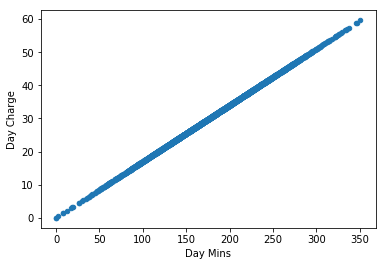

In [11]:
df.plot(kind="scatter", x="Day Mins", y="Day Charge")
# dado el grafico, se denota una relacion lineal entre las dos variables (x e y)
# esto indica que se puede aplicar una regresion lineal, por ejemplo
# el grafico se interpreta como:
# entre mas minutos se carga el dispositivo, mayor sera su utilizacion

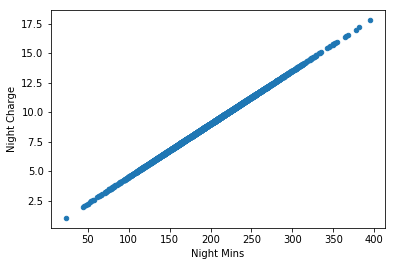

In [13]:
df.plot(kind='scatter', x="Night Mins", y="Night Charge")
# el grafico muestra nuevamente una relacion lineal

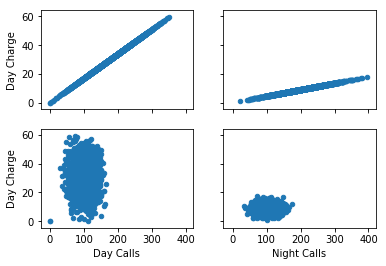

In [28]:
fig, axis = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True)
# esto genera una figura vacia a la cual se le pueden "enchufar" 4 diagramas

# primeros dos diagramas
df.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axis[0, 0])
df.plot(kind='scatter', x="Night Mins", y="Night Charge", ax=axis[0, 1]) # de noche se llama menos que de dia, segun el grafico

# los plots de abajo no muestran mucha correlacion
df.plot(kind="scatter", x="Day Calls", y="Day Charge", ax=axis[1, 0])
df.plot(kind='scatter', x="Night Calls", y="Night Charge", ax=axis[1, 1])

### Histograma de Frecuencias

Es un gran modo para ver como se distribuye una variable numerica para ver sus rangos o grupos, etc

Text(0.5,1,'Histograma de Numero de Llamadas al Dia')

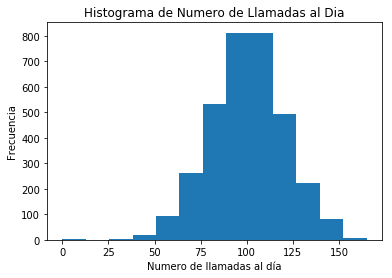

In [63]:
# plot [1, 0]
k = np.log2(df["Day Calls"].shape[0]).round().astype(int) + 1 # 13
plt.hist(df["Day Calls"], bins=k)
# plt.hist(df["Day Calls"], bins=[0, 30, 60, 90, 120, 150, 180])
# si en bins=[0, 30, 60] veo que en 30 no hay nada, lo puedo sacar
# dejandolo como [0, 60], luego el plot se agrupan todos los datos en 0 y 60
# plt.hist(variable_a_representar, num_divisiones_de_datos)
# bins = numero de trocitos iguales
# tampoco es llegar y poner un numero cualquiera. Por ello, uno puede regirse por
# la regla de sturges, la cual propone que bins = 1 + log2(tamaño_muestra)
plt.xlabel('Numero de llamadas al día')
plt.ylabel('Frecuencia')
plt.title('Histograma de Numero de Llamadas al Dia')

# Boxplot, Diagrama de Caja y Bigotes

Text(0.5,1,'Boxplot de las llamadas diarias')

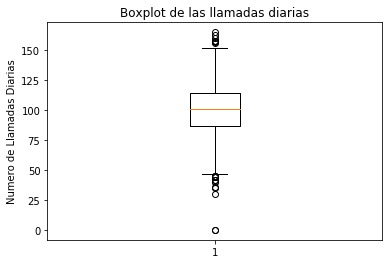

In [71]:
# podemos ver en el histograma que despues de 0, 25 y 150 hay unos valores bajitos
plt.boxplot(df["Day Calls"])
plt.ylabel("Numero de Llamadas Diarias")
plt.title("Boxplot de las llamadas diarias")
# la caja indica donde esta la gran mayoria de los datos
# si ordenaramos los datos, la caja comenzaria (de abajo hacia arriba)
# desde el valor que ocupe el 25% (es decir que queda 1/4 de los datos abajo)
# y el borde superior define el percentil 75%, es decir que por encima queda el 25% de los datos mas grandes
# la raya amarilla es el percentil 50 (o la mediana, valor central)

In [76]:
df["Day Calls"].describe()
# fijarse en la media, min, max y los cuantiles. Estan representados en los graficos
# Rango intercuantilico o IQR: 75% - 25% => es la altura de la caja
# Los bigotes se colocan a 1.5 veces el rango intercuantilico como maximo
# Los valores que se escapan de este 1.5 veces son representados como bolitas

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [80]:
# altura de la caja
# IQR = 114 - 87
IQR = df["Day Calls"].quantile(0.75) - df["Day Calls"].quantile(0.25)
IQR

27.0

In [81]:
# bigotes
df["Day Calls"].quantile(0.25) - 1.5*IQR # 46.5, aqui es donde acaba el limite inferior del bigote

46.5

In [84]:
df["Day Calls"].quantile(0.75) + 1.5*IQR # 154.5, aqui es donde acaba el limite superior del bigote

# TODO LO QUE ESTA POR ENCIMA O DEBAJO DE 1.5*IQR ES UN OUTLIER, estas son las bolitas
# Menos bolitas significa que mejor distribuidos estan los datos

154.5